<a href="https://colab.research.google.com/github/hericax/Pos/blob/master/projeto_3/aed_projeto_3(colab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE 2

# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

Questionamentos a serem investigados:

1 - As maiores média de votos está relacionada a algum genero específico?

2 - As maiores média de votos está relacionada a algum idioma original?

3 - As maiores média de votos está relacionada a algum cia de produção?

!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0

!apt-get install graphviz

In [99]:

# IMPORTANDO BIBLIOTECAS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno #! pip install missingno


from sklearn.preprocessing import StandardScaler #z-score
from sklearn import preprocessing # normalização MIM-MAX
from sklearn.preprocessing import RobustScaler 
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste

from sklearn import tree
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn import utils

In [100]:
# lendo arquivo no google drive
'''
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = '/content/drive/My Drive/Colab Notebooks/projeto_3/filmes/filmes_df_limpo.csv'
df = pd.read_csv(arquivo_base)
df.head()
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive', force_remount=True)\narquivo_base = '/content/drive/My Drive/Colab Notebooks/projeto_3/filmes/filmes_df_limpo.csv'\ndf = pd.read_csv(arquivo_base)\ndf.head()\n"

In [101]:
# lendo o arquivo localmente
df_final = pd.read_csv(r'C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/filmes_df_limpo.csv')

In [102]:
df_final.head(3)

,titulo,generos_ordenados,descricao,duracao,video,ano_lancamento,lingua,cod_lingua,qtde_votos,acao,...,Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),English,Français,日本語,Italiano,Español,media_votos
0,Toy Story,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",81.0,False,1995,Inglês,1.0,5415.0,False,...,False,False,False,False,True,False,False,False,False,7.7
1,Jumanji,"['Adventure', 'Family', 'Fantasy']",When siblings Judy and Peter discover an encha...,104.0,False,1995,Inglês,1.0,2413.0,False,...,False,False,False,False,True,True,False,False,False,6.9
2,Grumpier Old Men,"['Comedy', 'Romance']",A family wedding reignites the ancient feud be...,101.0,False,1995,Inglês,1.0,92.0,False,...,False,False,False,False,True,False,False,False,False,6.5


In [103]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

## Hipótese 1 - As maiores média de votos está relacionada a algum genero específico?

In [104]:
df_final.dtypes

titulo                                       object
generos_ordenados                            object
descricao                                    object
duracao                                     float64
video                                          bool
ano_lancamento                                int64
lingua                                       object
cod_lingua                                  float64
qtde_votos                                  float64
acao                                           bool
aventura                                       bool
animacao                                       bool
comedia                                        bool
crime                                          bool
documentario                                   bool
drama                                          bool
familia                                        bool
fantasia                                       bool
estrangeiro                                    bool
historia    

Text(0, 0.5, 'Média Votos')

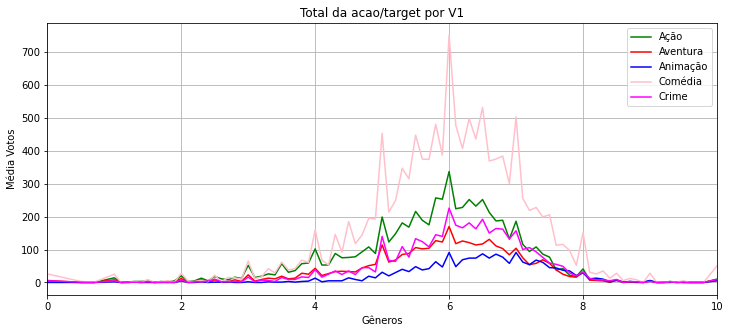

In [105]:
# Como são várias as features de gênero, as dividi em grupo para facilitar a visualização
x = df_final.groupby(['media_votos']).sum()

x['acao'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ação')
x['aventura'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Aventura')
x['animacao'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Animação')
x['comedia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Comédia')
x['crime'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Crime')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que a comédia é o gênero com maior média de votos, seguido da ação

Text(0, 0.5, 'Média Votos')

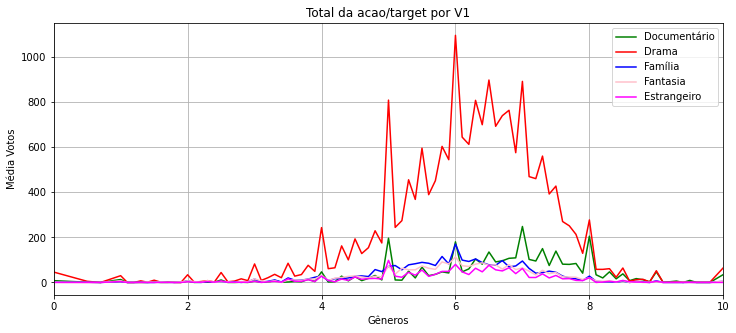

In [106]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['documentario'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Documentário')
x['drama'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Drama')
x['familia'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Família')
x['fantasia'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Fantasia')
x['estrangeiro'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Estrangeiro')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, estando os demais mais ou menos no memo nível

Text(0, 0.5, 'Média Votos')

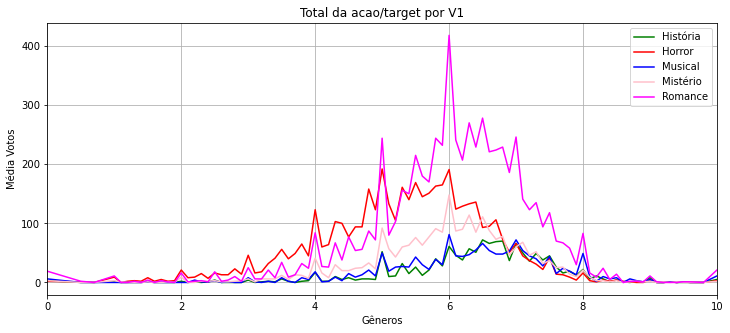

In [107]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['historia'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='História')
x['horror'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Horror')
x['musical'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Musical')
x['misterio'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Mistério')
x['romance'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Romance')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o romance é o gênero com maior média de votos, segido do horror.

Text(0, 0.5, 'Média Votos')

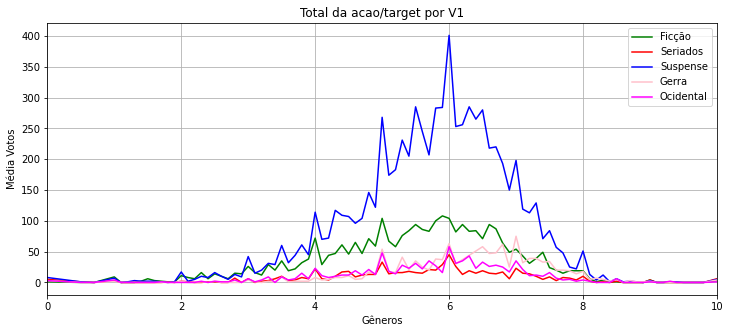

In [108]:
# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['ficcao_cientifica'].plot(kind = 'line',color='green', title='Total da acao/target por V1',grid=True, stacked=True,label='Ficção')
x['filmes_tv'].plot(kind = 'line',color='red', title='Total da acao/target por V1',grid=True, stacked=True,label='Seriados')
x['suspense'].plot(kind = 'line',color='blue', title='Total da acao/target por V1',grid=True, stacked=True,label='Suspense')
x['gerra'].plot(kind = 'line',color='pink', title='Total da acao/target por V1',grid=True, stacked=True,label='Gerra')
x['ocidental'].plot(kind = 'line',color='magenta', title='Total da acao/target por V1',grid=True, stacked=True,label='Ocidental')

plt.legend()
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o suspense é o gênero com maior média de votos, seguido da ficção

Text(0, 0.5, 'Média Votos')

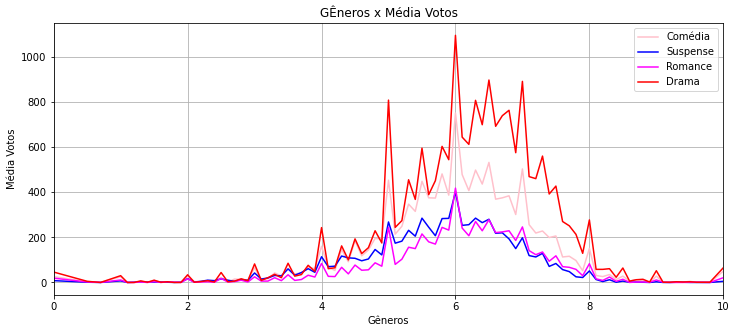

In [109]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['comedia'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='Comédia')
x['suspense'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Suspense')
x['romance'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Romance')
x['drama'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Drama')

plt.legend()
plt.title('GÊneros x Média Votos')
plt.xlabel("Gêneros")
plt.ylabel("Média Votos")


# Neste gráfico, percebemos que o drama é o gênero com maior média de votos, seguido da comédia. Os demais estão parecidos.

Conforme observamos, o gênero que possui a maior média de votos é o Drama, seja isolado, seja em conjunto com outros gêneros. Dos 10 maiores, o Drama está presente em 6. 

## Hipótese 2 - As maiores média de votos está relacionada a algum idioma original?

In [110]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

In [111]:
lingua = df_final[['lingua','media_votos']].groupby('lingua').sum().sort_values(by = 'media_votos', ascending = False).head(10)
lingua

,media_votos
lingua,
Inglês,175428.2
Francês,14640.3
Japonês,8418.3
Italiano,8251.3
Espanhol,7795.5
Alemão,6277.7
Russo,4658.3
Hindi,2904.2
Coreano,2903.4


Text(0.5, 1.0, 'Lingua x média de votos')

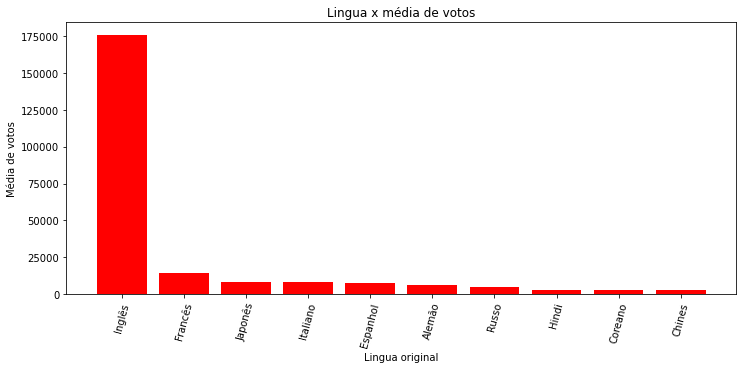

In [112]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['lingua','media_votos']].groupby('lingua').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.lingua,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Lingua original")
plt.ylabel("Média de votos")
plt.title("Lingua x média de votos")

In [113]:
total_ingles = len(df_final[df_final['lingua'] == "Inglês"])

outras_linguas = ['Francês', 'Chines', 'Italiano', 'Persa', 'Neerlandês',
       'Alemão', 'Mandarim padrão', 'Argentino', 'Espanhol', 'Russo',
       'Japonês', 'Coreano', 'Sérvio', 'Bengali', 'Hebraico', 'Português',
       'Wolof', 'Romeno', 'Húngaro', 'Galês', 'Vietnamita', 'hrv',
       'Dinamarquês', 'Norueguês', 'Bokmål norueguês', 'Polonês',
       'Grego, Moderno', 'Shan', 'No Language', 'Macedônio', 'Tibetano',
       'Catalão', 'Finlandês', 'Tailandês', 'Eslovaco', 'Bósnio', 'Hindi',
       'Turco', 'Islandês', 'Pachto', 'Abecásio', 'Esperanto',
       'Georgiano', 'Mongol', 'Bambara', 'Zulu', 'Ucraniano', 'Africâner',
       'Latim', 'Estoniano', 'Curdo', 'Letão', 'Tâmil', 'Esloveno',
       'Tagalog', 'Urdu', 'Kinyarwanda', 'Indonésio', 'Búlgaro',
       'Marathi (Marāṭhī)', 'Lituano', 'Cazaque', 'Malaio', 'Albanês',
       'Quechua', 'Telugu', 'Amárico', 'Javanês', 'Tajique', 'Malayalam',
       'Croata', 'Lao', 'Aymará', 'Canarês', 'Nepali', 'Panjabi, Punjabi',
       'Galego', 'Quirguiz, Kyrgyz', 'Samoano', 'Basco', 'Tcheco',
       'Armênio', 'Inuktitut', 'Sinhala, Cingalês']
total_outras = 0
for i in outras_linguas:
    total_outras = total_outras + len(df_final[df_final['lingua'] == i])

total_linguas = total_outras + total_ingles

In [114]:
print ('total_outras=',total_outras, 'total_ingles=', total_ingles, '\n Total linguas', total_linguas, '\n diferença ingles - outras= ', total_ingles - total_outras, '\n registros dataset=', len(df_final.lingua))

total_outras= 12316 total_ingles= 29795 
 Total linguas 42111 
 diferença ingles - outras=  17479 
 registros dataset= 42111


In [115]:
print ("Ingles=", (total_ingles/total_linguas)*100)
print ("Outras=", (total_outras/total_linguas)*100)

Ingles= 70.75348483769086
Outras= 29.246515162309134


Percebe-se acima que mesmo somando todas as outras linguas originais dos filmes, o inglês é o maior idioma, com 70%. 

## Hipótese 3 - As maiores média de votos está relacionada a algum cia de produção?

In [116]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

In [117]:
print ('MGM', len(df_final[df_final['Metro-Goldwyn-Mayer (MGM)'] == True]))
print ('Warner', len(df_final[df_final['Warner Bros.'] == True]))
print ('Paramount', len(df_final[df_final['Paramount Pictures'] == True]))
print ('Fox', len(df_final[df_final['Twentieth Century Fox Film Corporation'] == True]))
print ('Universal', len(df_final[df_final['Universal Pictures'] == True]))
print ('RKO', len(df_final[df_final['RKO Radio Pictures'] == True]))
print ('Columbia', len(df_final[df_final['Columbia Pictures'] == True]))
print ('Mosfilm', len(df_final[df_final['Mosfilm'] == True]))
print ('Walt Disney', len(df_final[df_final['Walt Disney Pictures'] == True]))
print ('Universal International Pictures (UI)', len(df_final[df_final['Universal International Pictures (UI)'] == True]))

MGM 990
Warner 1186
Paramount 968
Fox 812
Universal 817
RKO 259
Columbia 419
Mosfilm 183
Walt Disney 261
Universal International Pictures (UI) 94


Text(0, 0.5, 'Média Votos')

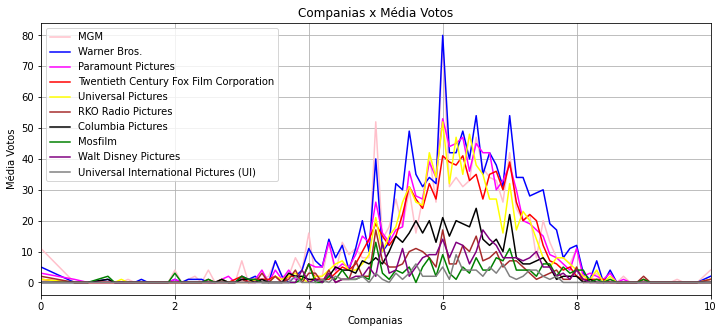

In [118]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()

x['Metro-Goldwyn-Mayer (MGM)'].plot(kind = 'line',color='pink',grid=True, stacked=True,label='MGM')
x['Warner Bros.'].plot(kind = 'line',color='blue',grid=True, stacked=True,label='Warner Bros.')
x['Paramount Pictures'].plot(kind = 'line',color='magenta',grid=True, stacked=True,label='Paramount Pictures')
x['Twentieth Century Fox Film Corporation'].plot(kind = 'line',color='red', grid=True, stacked=True,label='Twentieth Century Fox Film Corporation')
x['Universal Pictures'].plot(kind = 'line',color='yellow', grid=True, stacked=True,label='Universal Pictures')
x['RKO Radio Pictures'].plot(kind = 'line',color='brown', grid=True, stacked=True,label='RKO Radio Pictures')
x['Columbia Pictures'].plot(kind = 'line',color='black', grid=True, stacked=True,label='Columbia Pictures')
x['Mosfilm'].plot(kind = 'line',color='green', grid=True, stacked=True,label='Mosfilm')
x['Walt Disney Pictures'].plot(kind = 'line',color='purple', grid=True, stacked=True,label='Walt Disney Pictures')
x['Universal International Pictures (UI)'].plot(kind = 'line',color='grey', grid=True, stacked=True,label='Universal International Pictures (UI)')

plt.legend()
plt.title('Companias x Média Votos')
plt.xlabel("Companias")
plt.ylabel("Média Votos")

In [119]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'video',
       'ano_lancamento', 'lingua', 'cod_lingua', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.',
       'Paramount Pictures', 'Twentieth Century Fox Film Corporation',
       'Universal Pictures', 'RKO Radio Pictures', 'Columbia Pictures',
       'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais produ

Text(0, 0.5, 'Média Votos')

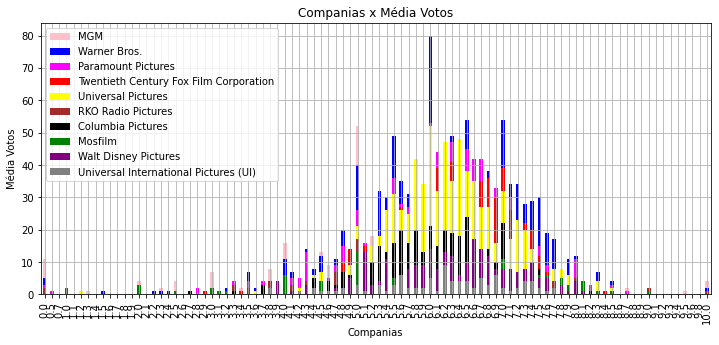

In [120]:
# plotando os maiores dos gêneros obtidos nos gráficos acima: comédia, suspense, romance e drama

# Como são várias as features de gênero, as divide
x = df_final.groupby(['media_votos']).sum()


x['Metro-Goldwyn-Mayer (MGM)'].plot(kind = 'bar',color='pink',grid=True, stacked=True,label='MGM')
x['Warner Bros.'].plot(kind = 'bar',color='blue',grid=True, stacked=True,label='Warner Bros.')
x['Paramount Pictures'].plot(kind = 'bar',color='magenta',grid=True, stacked=True,label='Paramount Pictures')
x['Twentieth Century Fox Film Corporation'].plot(kind = 'bar',color='red', grid=True, stacked=True,label='Twentieth Century Fox Film Corporation')
x['Universal Pictures'].plot(kind = 'bar',color='yellow', grid=True, stacked=True,label='Universal Pictures')
x['RKO Radio Pictures'].plot(kind = 'bar',color='brown', grid=True, stacked=True,label='RKO Radio Pictures')
x['Columbia Pictures'].plot(kind = 'bar',color='black', grid=True, stacked=True,label='Columbia Pictures')
x['Mosfilm'].plot(kind = 'bar',color='green', grid=True, stacked=True,label='Mosfilm')
x['Walt Disney Pictures'].plot(kind = 'bar',color='purple', grid=True, stacked=True,label='Walt Disney Pictures')
x['Universal International Pictures (UI)'].plot(kind = 'bar',color='grey', grid=True, stacked=True,label='Universal International Pictures (UI)')


plt.legend()
plt.title('Companias x Média Votos')
plt.xlabel("Companias")
plt.ylabel("Média Votos")

Percebe-se que a companhia com as maiores médias de votos é a Warner

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

Será criado um modelo de regrassão para prever a média de votos dos filmes.

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


### DISCRETIZAÇÃO DA FEATURE DURACAO

In [121]:
# verificando a correlação da duração com a média de votos
corr_ini_duracao = df_final['duracao'].corr(df_final['media_votos'])
print ('duração x media_votos',corr_ini_duracao)

duração x media_votos 0.10523610831821478


In [122]:
df_final.duracao.dtype

dtype('float64')

In [123]:
# Vou tentar criar grupos para definir a feture e verificar se há melhora na correlação
intervals = pd.qcut(df_final['duracao'], 2).astype(str).unique()
intervals

array(['(0.999, 95.0]', '(95.0, 1256.0]'], dtype=object)

In [124]:
df_final['tipo_duracao'] = pd.qcut(df_final['duracao'], 2).astype(str).map( {
                            intervals[0]: 'media',
                            intervals[1]: 'longa'
                            } ).astype(str)
df_final[['duracao','tipo_duracao']]

,duracao,tipo_duracao
0,81.0,media
1,104.0,longa
2,101.0,longa
3,127.0,longa
4,106.0,longa
...,...,...
42106,30.0,media
42107,85.0,media
42108,104.0,longa
42109,360.0,longa


Text(0.5, 1.0, 'Tipo de duração x média de votos')

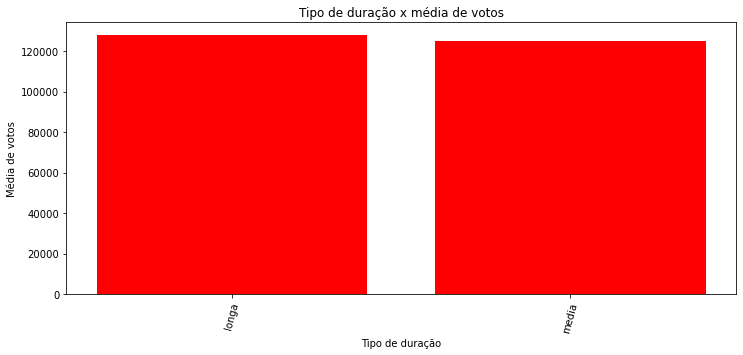

In [125]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['tipo_duracao','media_votos']].groupby('tipo_duracao').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.tipo_duracao,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Tipo de duração")
plt.ylabel("Média de votos")
plt.title("Tipo de duração x média de votos")

In [126]:
# Convertando strings em numéricos usando dicionário

df_final['tipo_duracao'] = df_final['tipo_duracao'].map({
'media': 0, 
'longa': 1})

In [127]:
# verificando a correlação da duração com a média de votos
corr_fim_duracao = df_final['tipo_duracao'].corr(df_final['media_votos'])
print ('Tipo duração x media_votos',corr_fim_duracao)

Tipo duração x media_votos 0.1543481244248171


In [128]:
print ('Final', corr_fim_duracao, ' | inicial', corr_ini_duracao)

Final 0.1543481244248171  | inicial 0.10523610831821478


Fiz o teste da correlação para os valores de 2 a 5 grupos. Quanto maior a qtde de grupos, pior a correlação.
Nova feature mantida pois houve uma pequena melhora na correlação.

### DISCRETIZAÇÃO DA FEATURE ANO_LANCAMENTO

In [129]:
# verificando a correlação da duração com a média de votos
corr_ini_anoLancamento = df_final['ano_lancamento'].corr(df_final['media_votos'])
print ('Ano lançamento x media_votos',corr_ini_anoLancamento)

Ano lançamento x media_votos -0.03091416660269355


In [130]:
# tentar criar períodos para melhor a correlação
# avaliando a quantidade de períodos a serem criados 
intervals = pd.qcut(df_final['ano_lancamento'], 10).astype(str).unique()
intervals

array(['(1985.0, 1995.0]', '(1995.0, 2001.0]', '(1972.0, 1985.0]',
       '(1955.0, 1972.0]', '(1873.999, 1955.0]', '(2009.0, 2012.0]',
       '(2012.0, 2014.0]', '(2001.0, 2006.0]', '(2006.0, 2009.0]',
       '(2014.0, 2017.0]'], dtype=object)

In [131]:
# criando os perídos para definir o ano de lançamento dos filmes
df_final['periodo'] = pd.qcut(df_final['ano_lancamento'], 10).astype(str).map({intervals[0]: '1993 a 2000',
        intervals[1]: '1970 a 1982',
        intervals[2]: '1982 a 1993',
        intervals[3]: '1952 a 1970',
        intervals[4]: '1873 a 1952',
        intervals[5]: '2000 a 2005',
        intervals[6]: '2009 a 2012',
        intervals[7]: '2012 a 2014',
        intervals[8]: '2005 a 2009',
        intervals[9]: '2014 a 2020'} ).astype(str)

df_final[['ano_lancamento','periodo']]

,ano_lancamento,periodo
0,1995,1993 a 2000
1,1995,1993 a 2000
2,1995,1993 a 2000
3,1995,1993 a 2000
4,1995,1993 a 2000
...,...,...
42106,2000,1970 a 1982
42107,1995,1993 a 2000
42108,1991,1993 a 2000
42109,2011,2000 a 2005


Text(0.5, 1.0, 'Período x média de votos')

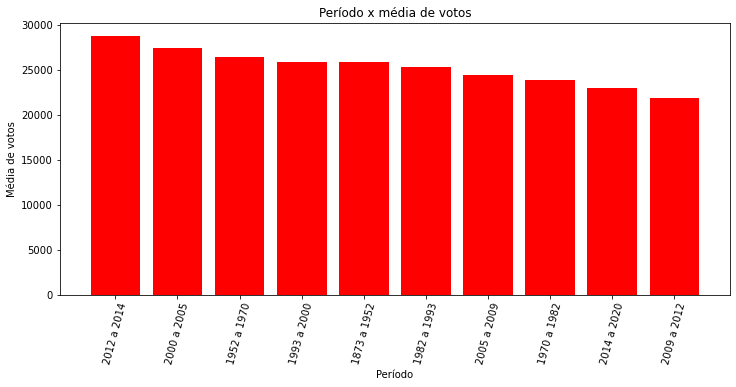

In [132]:
# plotando os 10 idiomas originais com maior média de votos
x = df_final[['periodo','media_votos']].groupby('periodo').sum().sort_values(by = 'media_votos', ascending = False).head(10)
x = x.reset_index()

plt.bar(x.periodo,x.media_votos,color='red')


plt.xticks(rotation=75)
plt.xlabel("Período")
plt.ylabel("Média de votos")
plt.title("Período x média de votos")

In [133]:
# Convertando strings em numéricos usando dicionário

df_final['tipo_duracao'] = df_final['periodo'].map({
    '1993 a 2000': 0,
    '1970 a 1982': 1,
    '1982 a 1993': 2,
    '1952 a 1970': 3,
    '1873 a 1952': 4,
    '2000 a 2005': 5,
    '2009 a 2012': 6,
    '2012 a 2014': 7,
    '2005 a 2009': 8,
    '2014 a 2020': 9
})

In [134]:
# verificando a correlação da duração com a média de votos
corr_fim_anoLancamento = df_final['tipo_duracao'].corr(df_final['media_votos'])
print ('Ano lançamento x media_votos',corr_fim_anoLancamento)

Ano lançamento x media_votos 0.0041960230418061


In [135]:
print (" final= ", corr_fim_anoLancamento, "| inicial = ",corr_ini_anoLancamento)

final=  0.0041960230418061 | inicial =  -0.03091416660269355


In [136]:
# Houve melhora então a nova feature será mantida

### FAZER A CORRELAÇÃO DAS FEATURES A SEREM TRABALHADAS

In [137]:
# verificando a correlação dos generos

print ('acao x media_votos',df_final['acao'].corr(df_final['media_votos']))
print ('aventura x media_votos',df_final['aventura'].corr(df_final['media_votos']))
print ('animacao x media_votos',df_final['animacao'].corr(df_final['media_votos']))
print ('comedia x media_votos',df_final['comedia'].corr(df_final['media_votos']))
print ('crime x media_votos',df_final['crime'].corr(df_final['media_votos']))
print ('documentario x media_votos',df_final['documentario'].corr(df_final['media_votos']))
print ('drama x media_votos',df_final['drama'].corr(df_final['media_votos']))
print ('familia x media_votos',df_final['familia'].corr(df_final['media_votos']))
print ('fantasia x media_votos',df_final['fantasia'].corr(df_final['media_votos']))
print ('estrangeiro x media_votos',df_final['estrangeiro'].corr(df_final['media_votos']))
print ('historia x media_votos',df_final['historia'].corr(df_final['media_votos']))
print ('horror x media_votos',df_final['horror'].corr(df_final['media_votos']))
print ('musical x media_votos',df_final['musical'].corr(df_final['media_votos']))
print ('misterio x media_votos',df_final['misterio'].corr(df_final['media_votos']))
print ('romance x media_votos',df_final['romance'].corr(df_final['media_votos']))
print ('ficcao_cientifica x media_votos',df_final['ficcao_cientifica'].corr(df_final['media_votos']))
print ('filmes_tv x media_votos',df_final['filmes_tv'].corr(df_final['media_votos']))
print ('suspense x media_votos',df_final['suspense'].corr(df_final['media_votos']))
print ('gerra x media_votos',df_final['gerra'].corr(df_final['media_votos']))
print ('ocidental x media_votos',df_final['ocidental'].corr(df_final['media_votos']))

acao x media_votos -0.08289026991958133
aventura x media_votos -0.02794159637963377
animacao x media_votos 0.0746324060560334
comedia x media_votos -0.01778207543223205
crime x media_votos 0.024917113064366954
documentario x media_votos 0.15044245555978217
drama x media_votos 0.12205091845631526
familia x media_votos -0.01386665979818757
fantasia x media_votos -0.013615448225225833
estrangeiro x media_votos -0.0045234706117887975
historia x media_votos 0.057966541022029916
horror x media_votos -0.18819159408147684
musical x media_votos 0.04891898096277814
misterio x media_votos -0.008024703581022141
romance x media_votos 0.011018217859676422
ficcao_cientifica x media_votos -0.11295899314774636
filmes_tv x media_votos -0.03709269978090582
suspense x media_votos -0.09543228084790208
gerra x media_votos 0.03892514555383787
ocidental x media_votos -0.03503105661478576


In [138]:
#Excluir as features com correlação negativa
'''acao x media_votos -0.08289026991958133
aventura x media_votos -0.02794159637963377
comedia x media_votos -0.01778207543223205
familia x media_votos -0.01386665979818757
fantasia x media_votos -0.013615448225225833
estrangeiro x media_votos -0.0045234706117887975
horror x media_votos -0.18819159408147684
misterio x media_votos -0.008024703581022141
ficcao_cientifica x media_votos -0.11295899314774636
filmes_tv x media_votos -0.03709269978090582
suspense x media_votos -0.09543228084790208
ocidental x media_votos -0.03503105661478576'''

df_final.drop(['acao','aventura','comedia', 'familia', 'fantasia', 'estrangeiro', 'horror', 'misterio',
    'ficcao_cientifica', 'filmes_tv', 'suspense', 'ocidental'], axis = 1, inplace = True)

In [139]:
print ('video x media_votos',df_final['video'].corr(df_final['media_votos']))

video x media_votos -0.006780320444616406


In [140]:
# remoção da feature video
df_final.drop(['video'], axis = 1, inplace = True)

In [141]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Metro-Goldwyn-Mayer (MGM)', 'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures', 'Mosfilm',
       'Walt Disney Pictures', 'Universal International Pictures (UI)',
       'United States of America (pais producao)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao)', 'Canada (pais producao).1',
       'Germany (pais producao)', 'Russia (pais producao)',
       'India (pais producao)', 'English', 'Français', '日本語', 'Italiano',
       'Español', 'media_votos', 'tipo_duracao', 'periodo'],
      dtype='object')

In [142]:
# features de companhias de produção
''''Metro-Goldwyn-Mayer (MGM)','Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'RKO Radio Pictures', 'Columbia Pictures', 'Mosfilm',
       'Walt Disney Pictures', 'Universal International Pictures (UI)'
       '''

print ('MGV',df_final['Metro-Goldwyn-Mayer (MGM)'].corr(df_final['media_votos']))
print ('Warner Bros. x media_votos',df_final['Warner Bros.'].corr(df_final['media_votos']))
print ('Paramount x media_votos',df_final['Paramount Pictures'].corr(df_final['media_votos']))
print ('Fox x media_votos',df_final['Twentieth Century Fox Film Corporation'].corr(df_final['media_votos']))
print ('Universal Pictures x media_votos',df_final['Universal Pictures'].corr(df_final['media_votos']))
print ('RKO Radio Pictures x media_votos',df_final['RKO Radio Pictures'].corr(df_final['media_votos']))
print ('Columbia Pictures x media_votos',df_final['Columbia Pictures'].corr(df_final['media_votos']))
print ('Mosfilm x media_votos',df_final['Mosfilm'].corr(df_final['media_votos']))
print ('Walt Disney Pictures x media_votos',df_final['Walt Disney Pictures'].corr(df_final['media_votos']))
print ('Universal International Pictures (UI) x media_votos',df_final['Universal International Pictures (UI)'].corr(df_final['media_votos']))

MGV -0.005643144906661703
Warner Bros. x media_votos 0.01930136964569854
Paramount x media_votos 0.013957583811027298
Fox x media_votos 0.020341785213981084
Universal Pictures x media_votos 0.018234667141779314
RKO Radio Pictures x media_votos -0.005677699693419887
Columbia Pictures x media_votos 0.00245139979446294
Mosfilm x media_votos 0.005155744715740199
Walt Disney Pictures x media_votos 0.017480801711270585
Universal International Pictures (UI) x media_votos 0.006105733010344674


In [143]:
# excluido das features com correlação negativa
'''
MGV -0.005643144906661703
RKO Radio Pictures x media_votos -0.005677699693419887

'''

df_final.drop(['Metro-Goldwyn-Mayer (MGM)','RKO Radio Pictures'], axis = 1, inplace = True)

In [144]:
# features de paizes onde os filmes foram produzidos
'''
'United States of America', 'United Kingdom', 'France', 'Japan',
       'Italy', 'Canada', 'Canada.1', 'Canada.2', 'Canada.3', 'Germany',
       'Russia', 'India', 'Canada.4', 'Canada.5', 'Canada.6', 'Canada.7',
       'English', 'Français', '日本語', 'Italiano', 'Español'
    '''
print ('United States of America',df_final['United States of America (pais producao)'].corr(df_final['media_votos']))
print ('United Kingdom x media_votos',df_final['United Kingdom (pais producao)'].corr(df_final['media_votos']))
print ('France x media_votos',df_final['France (pais producao)'].corr(df_final['media_votos']))
print ('Japan x media_votos',df_final['Japan (pais producao)'].corr(df_final['media_votos']))
print ('Italy x media_votos',df_final['Italy (pais producao)'].corr(df_final['media_votos']))
print ('Canada x media_votos',df_final['Canada (pais producao)'].corr(df_final['media_votos']))


United States of America -0.10648717484568719
United Kingdom x media_votos 0.052593871671175414
France x media_votos 0.0710288987447066
Japan x media_votos 0.07031332540118464
Italy x media_votos 0.02054726801840982
Canada x media_votos -0.04293418732490301


In [145]:
# remoção das features com correlação negativa
'''
United States of America -0.10648717484568719
Canada x media_votos -0.04293418732490301
'''

df_final.drop(['United States of America (pais producao)','Canada (pais producao)'], axis = 1, inplace = True)

In [146]:
df_final.columns

Index(['titulo', 'generos_ordenados', 'descricao', 'duracao', 'ano_lancamento',
       'lingua', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'English',
       'Français', '日本語', 'Italiano', 'Español', 'media_votos', 'tipo_duracao',
       'periodo'],
      dtype='object')

In [147]:
# correlação dos idimos de tradução
''' 'English', 'Français', '日本語', 'Italiano', 'Español' '''

print ('English x media_votos',df_final['English'].corr(df_final['media_votos']))
print ('Français x media_votos',df_final['Français'].corr(df_final['media_votos']))
print ('日本語 x media_votos',df_final['日本語'].corr(df_final['media_votos']))
print ('Italiano x media_votos',df_final['Italiano'].corr(df_final['media_votos']))
print ('Español x media_votos',df_final['Español'].corr(df_final['media_votos']))

English x media_votos -0.1104885381792159
Français x media_votos 0.05660434292842857
日本語 x media_votos 0.07409012325949083
Italiano x media_votos 0.021569352414188628
Español x media_votos 0.027626715546068107


In [148]:
# remoção das features com correlação negativa
'''
English x media_votos -0.1104885381792159
'''

df_final.drop(['English'], axis = 1, inplace = True)

## SELECIONANDO AS FEATURES

In [149]:
#Selecionando as features que serão utilizadas para redução da dimensionalidade e normalização 
X = df_final[[ 
    'ano_lancamento', 'cod_lingua', 'qtde_votos', 
       'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'
       ]]
       
y = df_final['media_votos']

In [150]:
print (type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [151]:
# transformando o y em STR
y = y.astype('int')

In [152]:
# guardando o rótulo das colunas
cols = X.columns

## REDUÇÃO DA DIMENSIONALIDADE



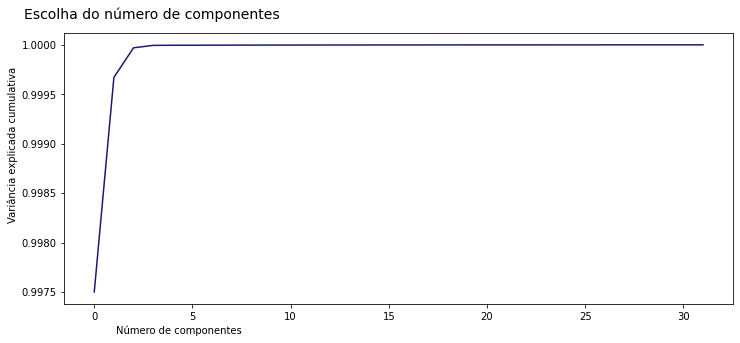

In [153]:
# AVALIAR QUAL A QUANTIDADE DE COMPONENTES UTILIZAR NO pca

plt.rcParams['figure.figsize'] = [12, 5]

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='#191970')

plt.title('Escolha do número de componentes', y=1.03, size=14, loc='left', x=-0.06)
plt.ylabel('Variância explicada cumulativa', horizontalalignment='left', y=0.30)
plt.xlabel('Número de componentes', horizontalalignment='right', x=0.265)
plt.show()

In [154]:
# APLICAR O PCA
dados_dimensionados = PCA(n_components=3).fit_transform(X)

dados_dimensionados = pd.DataFrame(dados_dimensionados)

dados_dimensionados.head(3)

,0,1,2
0,5296.451913,24.369031,4.075405
1,2294.493396,9.198037,-0.267284
2,-26.474498,-2.529592,-3.619711


In [155]:
# APLICAR O PCA
'''
dados_dimensionados = PCA(n_components=3).fit_transform(X)
dados_dimensionados
'''

'\ndados_dimensionados = PCA(n_components=3).fit_transform(X)\ndados_dimensionados\n'

In [156]:
dados_dimensionados.shape

(42111, 3)

## NORMALIZAÇÃO DOS DADOS

NORMALIZAÇÃO MIM-MAX

In [157]:
# A normalização é feita feature a feature e o objeto é colocar as variáveis dentro do intervalo de 0 e 1
min_max_scaler = preprocessing.MinMaxScaler() #dimensiona e traduz cada recurso individualmente, de modo que esteja no intervalo especificado no conjunto de treinamento (entre zero e um)
x_scaled = min_max_scaler.fit_transform(X)
df_normalizado_MIMMAX = pd.DataFrame(x_scaled)

# renomeando as colunas
df_normalizado_MIMMAX.set_axis(cols, axis='columns', inplace=True)
df_normalizado_MIMMAX.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,...,Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,0.846154,0.0,0.384681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.846154,0.0,0.171380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.846154,0.0,0.006466,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
df_normalizado_MIMMAX.shape


(42111, 32)

NORMALIZAÇÃO Z-SCORE

In [159]:
# normalizar os recursos (cada coluna dos dados) para que cada coluna/recurso/variável tenha mean = 0 e standard deviation = 1.
scaler = StandardScaler()
df_normalizado_scaler = scaler.fit_transform(X)
df_normalizado_scaler = pd.DataFrame(df_normalizado_scaler)

# renomeando as colunas
df_normalizado_scaler.set_axis(cols, axis='columns', inplace=True)
df_normalizado_scaler.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,...,Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,0.117197,-0.385,10.396118,4.649301,-0.329578,-0.295793,-0.915481,-0.181151,-0.190386,-0.424002,...,-0.222945,-0.203464,-0.232124,-0.146262,-0.137196,-0.323657,-0.200471,-0.227139,-0.230814,-1.569163
1,0.117197,-0.385,4.503718,-0.215086,-0.329578,-0.295793,-0.915481,-0.181151,-0.190386,-0.424002,...,-0.222945,-0.203464,-0.232124,-0.146262,-0.137196,3.089693,-0.200471,-0.227139,-0.230814,-1.569163
2,0.117197,-0.385,-0.051999,-0.215086,-0.329578,-0.295793,-0.915481,-0.181151,-0.190386,2.358477,...,-0.222945,-0.203464,-0.232124,-0.146262,-0.137196,-0.323657,-0.200471,-0.227139,-0.230814,-1.569163


In [160]:
df_normalizado_scaler.shape

(42111, 32)

In [161]:
type(df_normalizado_scaler)

pandas.core.frame.DataFrame

RobustScaler

In [162]:
#subtrai a média do valor em questão e então divide o resultado pelo segundo quartil.
df_nomealizado_robust = RobustScaler().fit_transform(X)
df_nomealizado_robust = pd.DataFrame(df_nomealizado_robust)

# renomeando as colunas
df_nomealizado_robust.set_axis(cols, axis='columns', inplace=True)
df_nomealizado_robust.head(3)

,ano_lancamento,cod_lingua,qtde_votos,animacao,crime,documentario,drama,historia,musical,romance,...,Italy (pais producao),Canada (pais producao).1,Germany (pais producao),Russia (pais producao),India (pais producao),Français,日本語,Italiano,Español,tipo_duracao
0,-0.1875,0.0,154.400000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8
1,-0.1875,0.0,68.628571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.8
2,-0.1875,0.0,2.314286,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8


In [163]:
df_nomealizado_robust.shape

(42111, 32)

3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


Será utilizado como métrica o desvio padrão, que que serve para dizer o quanto os valores dos quais se extraiu a média são próximos ou distantes da própria média. Assim, quando se calcula o desvio padrão juntamente com a média de diferentes grupos, obtém-se mais informações para avaliar e diferenciar seus comportamentos.

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


In [164]:
# semente aleatória a ser utilizada em tydi
RANDOM_STATE = 1 #semente aleatória
test_size = 0.35 # 35% será amostra de teste

Divisão dos dados - redimencionados (PCA)

In [165]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(dados_dimensionados,y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)
                            

In [166]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_PCA.shape,'y=', y_train_PCA.shape,'\n','Dados de teste: X= ', X_test_PCA.shape,'y=', y_test_PCA.shape )

Quantidade de registros 

Dados de treino PCA: X = (27372, 3) y= (27372,) 
 Dados de teste: X=  (14739, 3) y= (14739,)


Divisão dos dados - normalização MIM_MAx

In [167]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_MIMMAX, X_test_MIMMAX, y_train_MIMMAX, y_test_MIMMAX = train_test_split(df_normalizado_MIMMAX, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [168]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_MIMMAX.shape,'y=', y_train_MIMMAX.shape,'\n','Dados de teste: X= ', X_test_MIMMAX.shape,'y=', y_test_MIMMAX.shape )

Quantidade de registros 

Dados de treino PCA: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


Divisão dos dados - normalização Z-SCORE

In [169]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_scaler, X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(df_normalizado_scaler, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [170]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_scaler.shape,'y=', y_train_scaler.shape,'\n','Dados de teste: X= ', X_test_scaler.shape,'y=', y_test_scaler.shape )

Quantidade de registros 

Dados de treino PCA: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


Divisão dos dados - normalização ROBUST

In [171]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_robust, X_test_robust, y_train_robust, y_test_robust = train_test_split(df_nomealizado_robust, y, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

In [172]:
print ('Quantidade de registros \n')
print('Dados de treino PCA: X =', X_train_robust.shape,'y=', y_train_robust.shape,'\n','Dados de teste: X= ', X_test_robust.shape,'y=', y_test_robust.shape)

Quantidade de registros 

Dados de treino PCA: X = (27372, 32) y= (27372,) 
 Dados de teste: X=  (14739, 32) y= (14739,)


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


In [173]:
# criar o DF para armazenas as métrica coletadas em cada algoritmo
COLUNAS = [
    'tipo_dado', # se é PCA, MIM-MAX, Scaler ou robust
    'media_teste', 
    'media_treino',
    'diferenca_media',
    'desvio_teste' ,
    'desvio_teste',
    'diferenca_desvio'    
]

df_tree_metricas = pd.DataFrame(columns=COLUNAS)
df_tree_metricas

,tipo_dado,media_teste,media_treino,diferenca_media,desvio_teste,desvio_teste,diferenca_desvio


## Baseline - PCA

In [174]:
# Criando a árvore
dec_clf_PCA = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)

# Usando os dados de treino para treinar o modelo
dec_clf_PCA.fit(X_train_PCA, y_train_PCA)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [175]:

# Aplica o modelo nas variáveis de treino
y_pred_PCA_treino = dec_clf_PCA.predict(X_train_PCA)
media_treino = y_pred_PCA_treino.mean()
desvio_padrao_treino = y_pred_PCA_treino.std()

# Aplica o modelo nas variáveis de teste
y_pred_PCA_teste = dec_clf_PCA.predict(X_test_PCA)
media_teste = y_pred_PCA_teste.mean()
desvio_padrao_teste = y_pred_PCA_teste.std()


# comparando
print ("média -> teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (media_teste, media_treino, media_teste - media_treino))
print ("desvio padrão ->  teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (desvio_padrao_teste, desvio_padrao_treino, desvio_padrao_teste - desvio_padrao_treino))

# GUARDANDO AS MÉTRICAS PARA COMPARAÇÃO FUTURA
metricas_pca = []
metricas_pca.append(['BASELINE', media_teste, media_treino, media_teste - media_treino, desvio_padrao_teste, desvio_padrao_treino, desvio_padrao_teste - desvio_padrao_treino])
metricas_pca

média -> teste:[5.47] x treino:[5.49] e diferença:[-0.02]
desvio padrão ->  teste:[1.32] x treino:[1.30] e diferença:[0.02]


[['BASELINE',
  5.469366985548545,
  5.48593453163817,
  -0.016567546089625296,
  1.3174709264482634,
  1.2991693632623882,
  0.01830156318587517]]

# inicio testes

In [176]:
# validando a previsão
# filmes toy story
df_final[['titulo','media_votos']][df_final.titulo == 'Toy Story']

,titulo,media_votos
0,Toy Story,7.7


In [177]:
y_train_PCA[0]

7

In [178]:
y_pred_PCA_treino[0]

6

In [179]:
df_final[['titulo','media_votos']][0:5]

,titulo,media_votos
0,Toy Story,7.7
1,Jumanji,6.9
2,Grumpier Old Men,6.5
3,Waiting to Exhale,6.1
4,Father of the Bride Part II,5.7


In [201]:
contador = 0
for item in y_train_PCA:
    print (item, '|', y_train_PCA[item], '|', y_pred_PCA_treino[item])
    contador = contador + 1

6 | 6 | 4
7 | 5 | 3
5 | 7 | 5
5 | 7 | 5
6 | 6 | 4
5 | 7 | 5
6 | 6 | 4
4 | 5 | 6
5 | 7 | 5
6 | 6 | 4
7 | 5 | 3


KeyError: 2

In [181]:
print(y_train_PCA, y_pred_PCA_treino)

13871    6
27503    7
11804    5
40013    5
246      6
        ..
7813     7
32511    6
5192     6
12172    6
33003    4
Name: media_votos, Length: 27372, dtype: int32 [6 7 5 ... 6 6 4]


In [182]:
y_pred_PCA_treino[0]

6

# fim teste

In [197]:
from sklearn.metrics import confusion_matrix

# Compara o resultado do modelo com o resultado verdadeiro
cnf_matrix = confusion_matrix(y_test_PCA, y_pred_PCA_teste)

# Constrói um Dataframe com a matriz de confusão apenas para ficar mais legível
#pd.DataFrame(cnf_matrix, columns=('Prev ' + dec_clf_PCA.classes_), index=('True ' + dec_clf_PCA.classes_))
pd.DataFrame(cnf_matrix, columns=(dec_clf_PCA.classes_), index=(dec_clf_PCA.classes_))


,0,1,2,3,4,5,6,7,8,9,10
0,7,1,1,2,2,11,6,1,2,0,1
1,2,2,2,2,12,26,6,8,1,1,1
2,3,0,7,23,38,53,54,20,2,3,1
3,4,0,22,72,111,147,123,60,8,2,2
4,7,5,38,120,300,475,421,147,29,4,3
5,7,16,63,186,541,1280,1255,530,75,11,7
6,11,15,59,178,554,1349,1949,893,115,8,7
7,7,9,32,70,225,560,864,705,98,13,4
8,3,4,10,14,57,135,131,108,45,3,6
9,2,2,1,1,8,18,19,8,1,1,1


In [184]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dec_clf_PCA, out_file=None, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### Baseline - MIMMAX

In [185]:
X_train_MIMMAX.columns

Index(['ano_lancamento', 'cod_lingua', 'qtde_votos', 'animacao', 'crime',
       'documentario', 'drama', 'historia', 'musical', 'romance', 'gerra',
       'Warner Bros.', 'Paramount Pictures',
       'Twentieth Century Fox Film Corporation', 'Universal Pictures',
       'Columbia Pictures', 'Mosfilm', 'Walt Disney Pictures',
       'Universal International Pictures (UI)',
       'United Kingdom (pais producao)', 'France (pais producao)',
       'Japan (pais producao)', 'Italy (pais producao)',
       'Canada (pais producao).1', 'Germany (pais producao)',
       'Russia (pais producao)', 'India (pais producao)', 'Français', '日本語',
       'Italiano', 'Español', 'tipo_duracao'],
      dtype='object')

In [186]:
# CRIANDO A ARVORE
dec_clf_MIMMAX = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)

# TREINANDO
dec_clf_MIMMAX.fit(X_train_MIMMAX, y_train_MIMMAX)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [187]:
# Aplica o modelo nas variáveis de teste
y_pred_MIMMAX_teste = dec_clf_MIMMAX.predict(X_test_MIMMAX)
media_teste_MIMMAX = y_pred_MIMMAX_teste.mean()
desvio_padrao_teste_MIMMAX = y_pred_MIMMAX_teste.std()

# Aplica o modelo nas variáveis de treino
y_pred_MIMMAX_treino = dec_clf_MIMMAX.predict(X_train_MIMMAX)
media_treino_MIMMAX = y_pred_MIMMAX_treino.mean()
desvio_padrao_treino_MIMMAX = y_pred_MIMMAX_treino.std()

# comparando
print ("média -> teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (media_teste_MIMMAX, media_treino_MIMMAX, 
    media_teste_MIMMAX - media_treino_MIMMAX))
print ("desvio padrão ->  teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (desvio_padrao_teste_MIMMAX, desvio_padrao_treino_MIMMAX, 
    desvio_padrao_teste_MIMMAX - desvio_padrao_treino_MIMMAX))

# GUARDANDO AS MÉTRICAS PARA COMPARAÇÃO FUTURA
metricas_MIMMAX = []
metricas_MIMMAX.append(['BASELINE', media_teste_MIMMAX, media_treino_MIMMAX, 
    media_teste_MIMMAX - media_treino_MIMMAX, desvio_padrao_teste_MIMMAX, desvio_padrao_treino_MIMMAX, 
    desvio_padrao_teste_MIMMAX - desvio_padrao_treino_MIMMAX])
metricas_MIMMAX

média -> teste:[5.47] x treino:[5.49] e diferença:[-0.02]
desvio padrão ->  teste:[1.34] x treino:[1.30] e diferença:[0.04]


[['BASELINE',
  5.4671958748897485,
  5.48593453163817,
  -0.01873865674842179,
  1.3416076424400027,
  1.2991693632623882,
  0.04243827917761456]]

### Baseline - Z-score

In [188]:
# CRIANDO A ARVORE
dec_clf_scale = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)

# TREINANDO
dec_clf_scale.fit(X_train_scaler, y_train_scaler)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [189]:
# Aplica o modelo nas variáveis de teste
y_pred_scaler_teste = dec_clf_scale.predict(X_test_scaler)
media_teste_scaler = y_pred_scaler_teste.mean()
desvio_padrao_teste_scaler = y_pred_scaler_teste.std()

# Aplica o modelo nas variáveis de treino
y_pred_scaler_treino = dec_clf_scale.predict(X_train_scaler)
media_treino_scaler = y_pred_scaler_treino.mean()
desvio_padrao_treino_scaler = y_pred_scaler_treino.std()

# comparando
print ("média -> teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (media_teste_scaler, media_treino_scaler, 
    media_teste_scaler - media_treino_scaler))
print ("desvio padrão ->  teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (desvio_padrao_teste_scaler, desvio_padrao_treino_scaler, 
    desvio_padrao_teste_scaler - desvio_padrao_treino_scaler))

# GUARDANDO AS MÉTRICAS PARA COMPARAÇÃO FUTURA
metricas_SCALER = []
metricas_SCALER.append(['BASELINE', media_teste_scaler, media_treino_scaler, 
    media_teste_scaler - media_treino_scaler, desvio_padrao_teste_scaler, desvio_padrao_treino_scaler, 
    desvio_padrao_teste_scaler - desvio_padrao_treino_scaler])
metricas_SCALER

média -> teste:[5.47] x treino:[5.49] e diferença:[-0.02]
desvio padrão ->  teste:[1.34] x treino:[1.30] e diferença:[0.04]


[['BASELINE',
  5.467874346970622,
  5.48593453163817,
  -0.018060184667548107,
  1.3421802255558044,
  1.2991693632623882,
  0.04301086229341622]]

### Baseline - Robust

In [190]:
# CRIANDO A ARVORE
dec_clf_robust = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)

# TREINANDO
dec_clf_robust.fit(X_train_robust, y_train_robust)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [191]:
# Aplica o modelo nas variáveis de teste
y_pred_robust_teste = dec_clf_scale.predict(X_test_robust)
media_teste_robust = y_pred_robust_teste.mean()
desvio_padrao_teste_robust = y_pred_robust_teste.std()

# Aplica o modelo nas variáveis de treino
y_pred_robust_treino = dec_clf_robust.predict(X_train_robust)
media_treino_robust = y_pred_robust_treino.mean()
desvio_padrao_treino_robust = y_pred_robust_treino.std()

# comparando
print ("média -> teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (media_teste_robust, media_treino_robust, 
    media_teste_robust - media_treino_robust))
print ("desvio padrão ->  teste:[%.2f] x treino:[%.2f] e diferença:[%.2f]" % (desvio_padrao_teste_robust, desvio_padrao_treino_robust, 
    desvio_padrao_teste_robust - desvio_padrao_treino_robust))

# GUARDANDO AS MÉTRICAS PARA COMPARAÇÃO FUTURA
metricas_ROBUST = []
metricas_ROBUST.append(['BASELINE', media_teste_scaler, media_treino_scaler, 
    media_teste_scaler - media_treino_scaler, desvio_padrao_teste_scaler, desvio_padrao_treino_scaler, 
    desvio_padrao_teste_scaler - desvio_padrao_treino_scaler, desvio_padrao_teste_robust, desvio_padrao_treino_robust, 
    desvio_padrao_teste_robust - desvio_padrao_treino_robust])
metricas_ROBUST

média -> teste:[6.35] x treino:[5.49] e diferença:[0.87]
desvio padrão ->  teste:[1.37] x treino:[1.30] e diferença:[0.07]


[['BASELINE',
  5.467874346970622,
  5.48593453163817,
  -0.018060184667548107,
  1.3421802255558044,
  1.2991693632623882,
  0.04301086229341622,
  1.3688939731871619,
  1.2991693632623882,
  0.0697246099247737]]

## Utilizando cross-validation e GridSearchCV para melhorar os modelos

In [192]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

In [193]:
# parâmetros a serem avaliados
param_grid = [
              {
                 'criterion':['gini', 'entropia'],
                 'max_depth': [5, 20, 50, None], # profundidade máxima da árvore
                 'min_samples_split': [2, 20, 50], # O número mínimo de amostras necessárias para dividir um nó interno
                 'min_samples_leaf': [30, 50, 80], # número mínimo de amostras necessárias para estar em um nó folha
                 'random_state': [1]
              }

]

### PCA

In [194]:
# execução do gridsearch para definição dos melhores parâmetros com os dados do PCA
gs_PCA = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, scoring='accuracy', cv=15, n_jobs=multiprocessing.cpu_count())
gs_PCA.fit(X_train_PCA, y_train_PCA)

GridSearchCV(cv=15, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid=[{'criterion': ['gini', 'entropia'],
                   

In [195]:
# importação da biblioteca do cross-validation
from sklearn.model_selection import cross_val_score

# execução do cross-validation com os parâmetros sugeridos pelo gridsearch
cross_val_score(gs_PCA.best_estimator_,X_train_PCA, y_train_PCA,scoring='accuracy',cv=15).mean()

0.36727411279339905

In [196]:
# visualização da melhor combinação dos valores dos parâmetros do perceptron
print('Melhor estimador=',gs_PCA.best_estimator_)

print("Melhor score=",gs_PCA.best_score_ * 100)

Melhor estimador= DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=80, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
Melhor score= 36.727411279339904


## MIM-MAX

## SCALER (Z-SCORE)

## ROBUST

6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*